In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("C:/Users/0004IW744/Desktop/Python/Assignments/8.PCA/wine.csv")

# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [7]:
# Considering only numerical data 
data.num = data.iloc[:,1:]

<ipython-input-7-3dea2d87cbd2>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.num = data.iloc[:,1:]


In [8]:
# Converting into numpy array
DATA = data.num.values
DATA

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
# Normalizing the numerical data using the scale method
data.num_normal = scale(DATA)
data.num_normal

<ipython-input-9-d53bc3a854f4>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.num_normal = scale(DATA)


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA Building

In [10]:
pca = PCA()
pca_values = pca.fit_transform(data.num_normal)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [19]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset = pd.DataFrame(data = pca_values, columns = ['comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6','comp7'] )

In [14]:
pca = PCA(n_components = 7)
pca_values = pca.fit_transform(data.num_normal)

In [15]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679])

In [16]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34])

In [25]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086]])

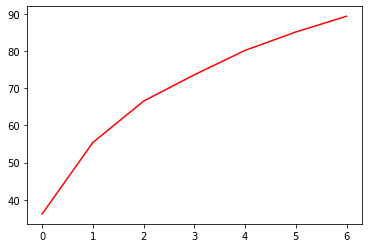

In [17]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

# Extracting the first first 3 principal components for further computation, Extracting the three features from PCA_dataset

In [25]:
principal_comp1 = PCA_dataset['comp1']
principal_comp2 = PCA_dataset['comp2']
principal_comp3 = PCA_dataset['comp3']

In [26]:
# Creating dataframe for further clusering algorithms
pca_data = pd.concat([principal_comp1, principal_comp2, principal_comp3], axis = 1)
pca_data.head()

,comp1,comp2,comp3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


# Hierarchical Clustering

In [31]:
#  Normalizing Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pca_data_normal = scaler.fit_transform(pca_data)


In [74]:
# create 3 clusters using the euclidean distance
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [76]:
# save clusters for chart
y_hc = hc.fit_predict(pca_values)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [75]:
data_final = pd.concat([pca_data,Clusters],axis=1)
data_final

,comp1,comp2,comp3,clusterid_new,Clusters
0,3.316751,-1.443463,-0.165739,2,0
1,2.209465,0.333393,-2.026457,1,0
2,2.516740,-1.031151,0.982819,2,0
3,3.757066,-2.756372,-0.176192,2,0
4,1.008908,-0.869831,2.026688,0,0
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2,0
174,-2.601956,-1.757229,0.207581,2,0
175,-2.677839,-2.760899,-0.940942,2,0
176,-2.387017,-2.297347,-0.550696,2,0


# K-Means

In [44]:
from sklearn.cluster import KMeans

In [45]:
d0_KMeans = pca_data

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_d0_KMeans = scaler.fit_transform(d0_KMeans.iloc[:,1:])

C:\Users\0004IW744\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


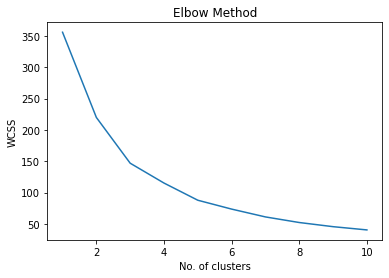

In [47]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_d0_KMeans)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_d0_KMeans)

KMeans(n_clusters=3, random_state=42)

In [49]:
clusters_new.labels_

array([2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2])

In [50]:
#Assign clusters to the data set
d0_KMeans['clusterid_new'] = clusters_new.labels_

In [51]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.6366699 ,  1.13765301],
       [ 1.04162492, -0.77890661],
       [-0.79113667, -0.2241414 ]])

In [52]:
d0_KMeans.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,comp1,comp2,comp3
,,mean,mean,mean
0,0,-0.153177,1.006054,1.368059
1,1,0.069523,1.645956,-0.936656
2,2,0.046106,-1.250140,-0.269536


In [53]:
d0_KMeans

,comp1,comp2,comp3,clusterid_new
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2
174,-2.601956,-1.757229,0.207581,2
175,-2.677839,-2.760899,-0.940942,2
176,-2.387017,-2.297347,-0.550696,2


# Preparing Actual Vs. Predicted Clusering Data

In [80]:
wine_Type = data['Type']
wine_Type = pd.Series(wine_class)


In [81]:
clustersid_HC = hc.labels_
clustersid_HC = pd.Series(clustersid_HC)

In [82]:
clusterid_Kmeans = clusters_new.labels_
clusterid_Kmeans = pd.Series(clusterid_Kmeans)

In [83]:
pred_df = pd.concat([wine_Type, clustersid_HC, clusterid_Kmeans],axis = 1)
pred_df

,Type,0,1
0,1,1,2
1,1,1,1
2,1,1,2
3,1,1,2
4,1,1,0
...,...,...,...
173,3,2,2
174,3,2,2
175,3,2,2
176,3,2,2
